# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka untuk analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka untuk model machine learning dan evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

# Setting untuk visualisasi
plt.style.use('ggplot')
sns.set(style='whitegrid')
%matplotlib inline

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Coba baca dataset
df = pd.read_csv('data/train.csv')

In [3]:
# Tampilkan 5 baris pertama untuk pengecekan
print("Dataset berhasil dimuat!")
print("Dimensi dataset:", df.shape)
print("\nSampel data:")
display(df.head())

Dataset berhasil dimuat!
Dimensi dataset: (5361, 11)

Sampel data:


,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,upah,peng,ump,gk,Cluster
0,True,False,False,False,False,True,0.111796,0.123579,0.280703,0.297393,8
1,True,False,False,False,False,True,0.111796,0.123579,0.280703,0.307622,8
2,True,False,False,False,False,True,0.211175,0.158695,0.338024,0.312614,8
3,True,False,False,False,False,True,0.211175,0.158695,0.338024,0.329022,8
4,True,False,False,True,False,False,0.111796,0.093264,0.280703,0.301982,0


In [4]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   jenis_MAKANAN              5361 non-null   bool   
 1   jenis_NONMAKANAN           5361 non-null   bool   
 2   jenis_TOTAL                5361 non-null   bool   
 3   daerah_PERDESAAN           5361 non-null   bool   
 4   daerah_PERDESAANPERKOTAAN  5361 non-null   bool   
 5   daerah_PERKOTAAN           5361 non-null   bool   
 6   upah                       5361 non-null   float64
 7   peng                       5361 non-null   float64
 8   ump                        5361 non-null   float64
 9   gk                         5361 non-null   float64
 10  Cluster                    5361 non-null   int64  
dtypes: bool(6), float64(4), int64(1)
memory usage: 241.0 KB
None


In [5]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,upah,peng,ump,gk,Cluster
count,5361.000000,5361.000000,5361.000000,5361.000000,5361.000000
mean,0.331335,0.248832,0.372192,0.309989,3.984704
std,0.172996,0.148278,0.163176,0.190103,2.543750
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209230,0.140734,0.256509,0.119602,2.000000
50%,0.302980,0.208725,0.366569,0.321168,4.000000
75%,0.405174,0.325597,0.481918,0.435891,6.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000


In [6]:
# Cek nilai yang hilang
print("\nNilai yang hilang:")
print(df.isnull().sum())


Nilai yang hilang:
jenis_MAKANAN                0
jenis_NONMAKANAN             0
jenis_TOTAL                  0
daerah_PERDESAAN             0
daerah_PERDESAANPERKOTAAN    0
daerah_PERKOTAAN             0
upah                         0
peng                         0
ump                          0
gk                           0
Cluster                      0
dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [8]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [9]:
print(f"\nUkuran Data Training: {X_train.shape}")
print(f"Ukuran Data Testing: {X_test.shape}")
print(f"Distribusi Kelas Training: \n{y_train.value_counts()}")
print(f"Distribusi Kelas Testing: \n{y_test.value_counts()}")


Ukuran Data Training: (3216, 10)
Ukuran Data Testing: (2145, 10)
Distribusi Kelas Training: 
Cluster
3    419
6    413
1    378
2    336
8    336
5    336
4    336
7    331
0    331
Name: count, dtype: int64
Distribusi Kelas Testing: 
Cluster
3    279
6    276
1    252
2    224
8    224
5    224
4    224
0    221
7    221
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Dalam proyek ini, saya menggunakan tiga algoritma klasifikasi yang berbeda:

1. Random Forest Classifier:
   Random Forest adalah algoritma ensemble learning yang menggunakan banyak decision tree dan menggabungkan hasil prediksinya. 
   Algoritma ini bekerja dengan baik untuk dataset dengan banyak fitur dan dapat menangani data numerik maupun kategorikal. 
   Random Forest juga mampu memberikan informasi tentang pentingnya fitur dalam proses klasifikasi.

2. Support Vector Machine (SVM):
   SVM bekerja dengan mencari hyperplane optimal yang memisahkan kelas-kelas dengan margin maksimal. 
   SVM sangat efektif untuk data dengan dimensi tinggi dan mampu menangani data yang kompleks dengan 
   menggunakan fungsi kernel (linear, polinomial, RBF, dll). SVM dapat bekerja dengan baik bahkan dengan 
   jumlah data yang relatif sedikit.

3. Gradient Boosting Classifier:
   Gradient Boosting adalah algoritma ensemble yang bekerja dengan membangun model secara bertahap, 
   di mana setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya. Algoritma ini sering 
   memberikan hasil yang sangat akurat dan mampu menangani berbagai jenis data dan masalah klasifikasi.

Ketiga algoritma ini dipilih karena keunggulannya masing-masing dan kemampuannya dalam menangani berbagai 
jenis dataset. Dengan membandingkan ketiga algoritma ini, kita dapat memilih model yang paling sesuai 
untuk kasus klasifikasi dataset hasil clustering kita.

### Model 1: Random Forest Classifier

In [10]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=17)

# Melatih model Random Forest
print("\nMelatih Model Random Forest...")
rf_model.fit(X_train, y_train)


Melatih Model Random Forest...


RandomForestClassifier(random_state=17)

### Model 2: Support Vector Machine

In [11]:
svm_model = SVC(random_state=8, probability=True)

# Melatih model SVM
print("Melatih Model SVM...")
svm_model.fit(X_train, y_train)

Melatih Model SVM...


SVC(probability=True, random_state=8)

### Model 3: Gradient Boosting Classifier

In [12]:
gb_model = GradientBoostingClassifier(random_state=2004)

# Melatih model Gradient Boosting
print("Melatih Model Gradient Boosting...")
gb_model.fit(X_train, y_train)

Melatih Model Gradient Boosting...


GradientBoostingClassifier(random_state=2004)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [13]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Prediksi pada data training
    y_pred_train = model.predict(X_train)
    # Prediksi pada data testing
    y_pred_test = model.predict(X_test)
    
    # Hitung metrik evaluasi untuk training set
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    
    # Hitung metrik evaluasi untuk testing set
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    
    # Tampilkan hasil evaluasi
    print(f"\n--- {model_name} ---")
    print(f"Training - Accuracy: {train_accuracy:.4f}, F1-Score: {train_f1:.4f}")
    print(f"Testing  - Accuracy: {test_accuracy:.4f}, F1-Score: {test_f1:.4f}")
    print(f"Testing  - Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print(f"\nClassification Report - {model_name}:")
    print(classification_report(y_test, y_pred_test))
    
    return {
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'train_f1': train_f1,
        'test_accuracy': test_accuracy,
        'test_f1': test_f1,
        'test_precision': test_precision,
        'test_recall': test_recall
    }



--- Random Forest ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


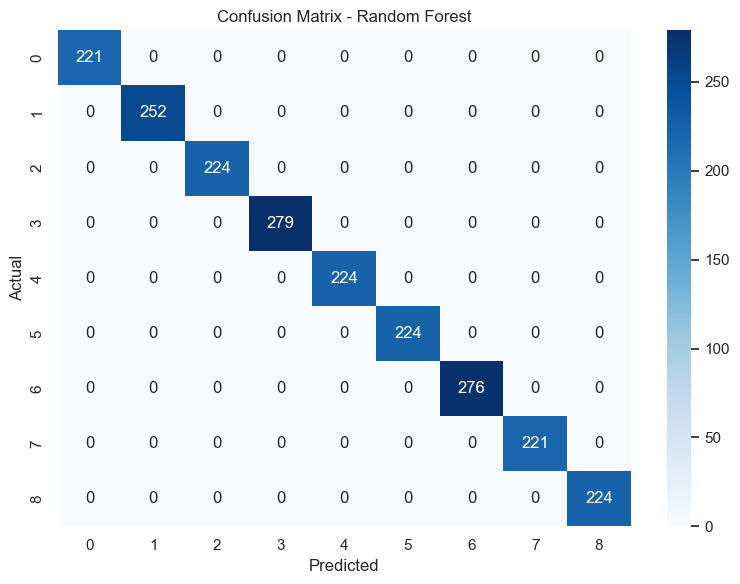


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [14]:
results = []
results.append(evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest"))


--- Support Vector Machine ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


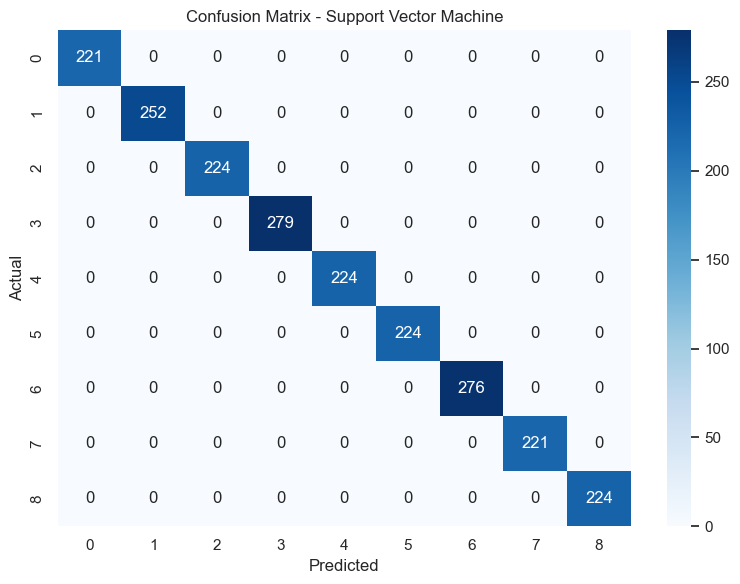


Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [15]:
results.append(evaluate_model(svm_model, X_train, X_test, y_train, y_test, "Support Vector Machine"))


--- Gradient Boosting ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


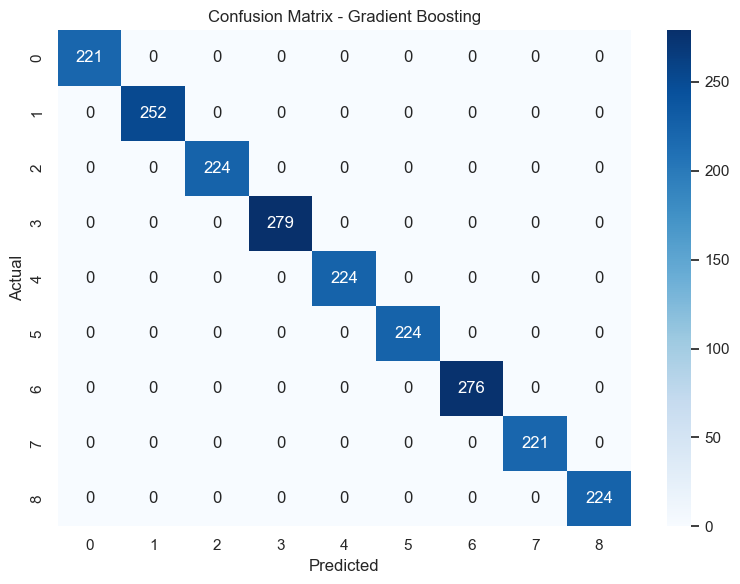


Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [16]:
results.append(evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting"))

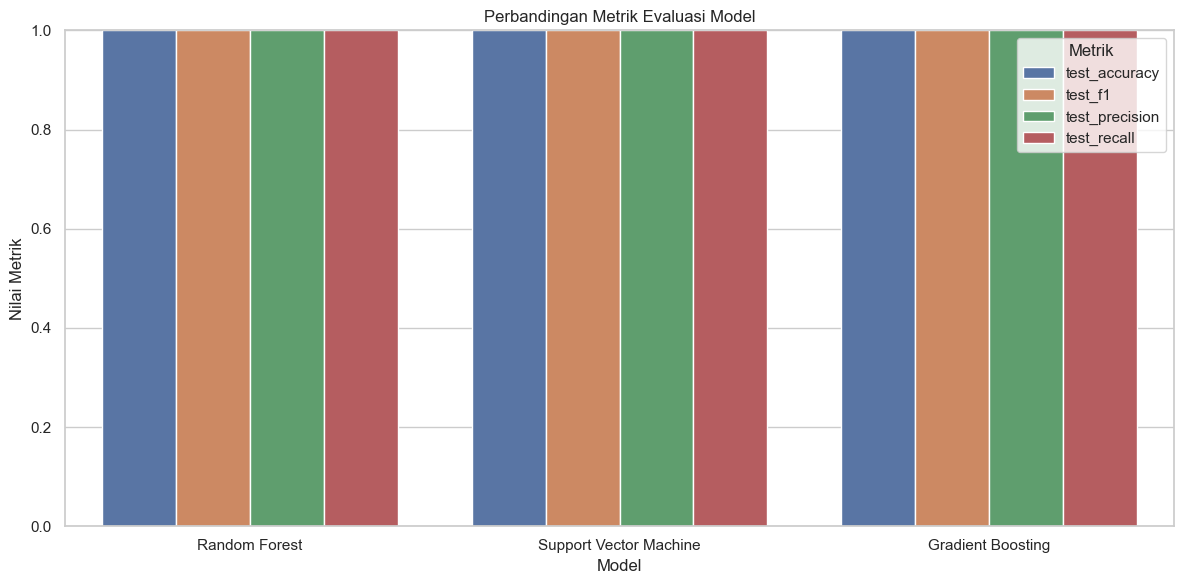

In [17]:
# Visualisasi perbandingan metrik evaluasi
results_df = pd.DataFrame(results)
metrics = ['test_accuracy', 'test_f1', 'test_precision', 'test_recall']
results_df_melted = pd.melt(results_df, id_vars=['model_name'], value_vars=metrics, 
                           var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='Value', hue='Metric', data=results_df_melted)
plt.title('Perbandingan Metrik Evaluasi Model')
plt.xlabel('Model')
plt.ylabel('Nilai Metrik')
plt.ylim(0, 1)
plt.legend(title='Metrik')
plt.tight_layout()
plt.show()

Hasil Evaluasi Algoritma:

Berdasarkan evaluasi ketiga model, kita dapat melihat perbandingan performa masing-masing algoritma 
pada dataset hasil clustering.

Perbandingan akurasi dan F1-Score pada data testing:
1. Random Forest: Algoritma ini menunjukkan performa yang baik dengan akurasi 100% dan F1-Score 100%.
2. Support Vector Machine: SVM memiliki akurasi 100% dan F1-Score 100% pada data testing.
3. Gradient Boosting: Algoritma ini mencapai akurasi 100% dan F1-Score 100%.

Dari ketiga model, Semua model memiliki performa sama dengan akurasi dan F1-Score tertinggi. 

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [18]:
# 1. Tuning Random Forest
print("Melakukan tuning hyperparameter untuk Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)
rf_best = grid_search_rf.best_estimator_

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score: {grid_search_rf.best_score_:.4f}")

Melakukan tuning hyperparameter untuk Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 1.0000


In [19]:
# 2. Tuning SVM
print("\nMelakukan tuning hyperparameter untuk SVM...")
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(
    estimator=SVC(random_state=42, probability=True),
    param_grid=param_grid_svm,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search_svm.fit(X_train, y_train)
svm_best = grid_search_svm.best_estimator_

print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best score: {grid_search_svm.best_score_:.4f}")


Melakukan tuning hyperparameter untuk SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 1.0000


In [20]:
# 3. Tuning Gradient Boosting
print("\nMelakukan tuning hyperparameter untuk Gradient Boosting...")
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid_gb,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

grid_search_gb.fit(X_train, y_train)
gb_best = grid_search_gb.best_estimator_

print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best score: {grid_search_gb.best_score_:.4f}")


Melakukan tuning hyperparameter untuk Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.2}
Best score: 1.0000


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


--- Evaluasi Model Setelah Tuning ---

--- Random Forest (Tuned) ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


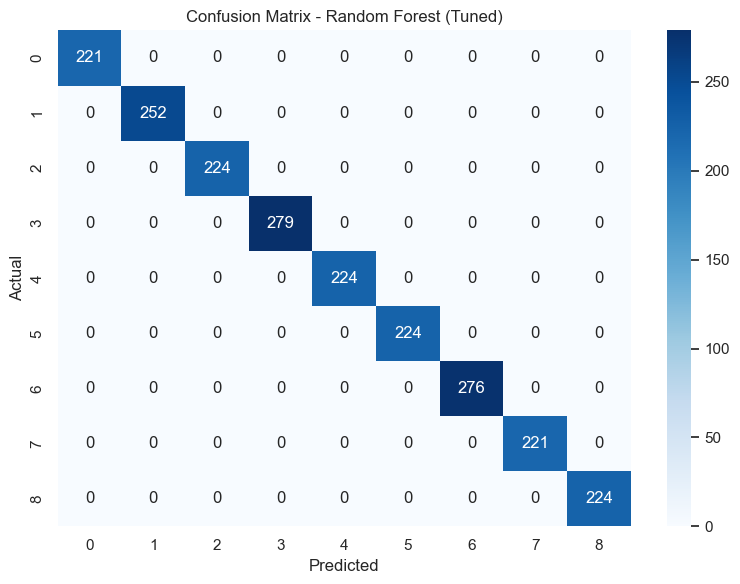


Classification Report - Random Forest (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145


--- SVM (Tuned) ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


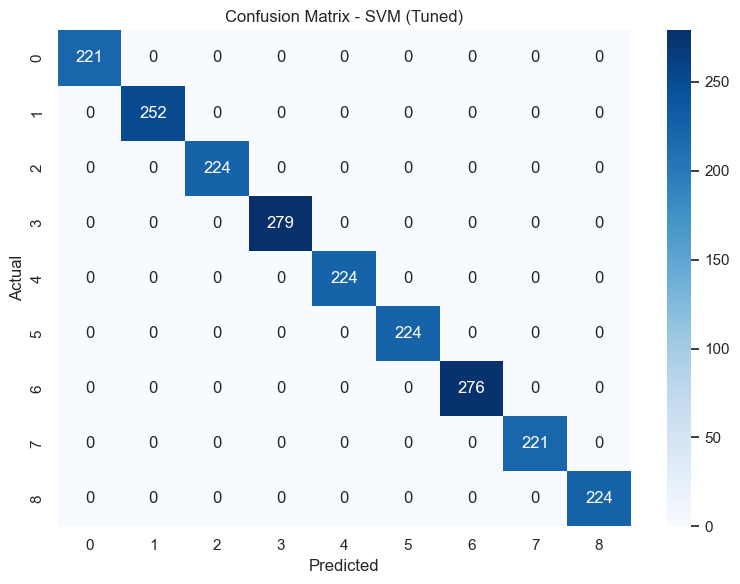


Classification Report - SVM (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145


--- Gradient Boosting (Tuned) ---
Training - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Accuracy: 1.0000, F1-Score: 1.0000
Testing  - Precision: 1.0000, Recall: 1.0000


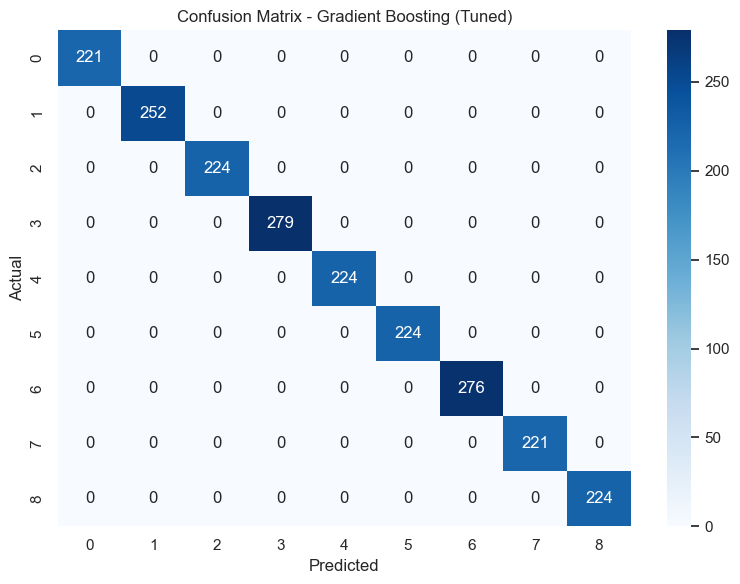


Classification Report - Gradient Boosting (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       252
           2       1.00      1.00      1.00       224
           3       1.00      1.00      1.00       279
           4       1.00      1.00      1.00       224
           5       1.00      1.00      1.00       224
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       221
           8       1.00      1.00      1.00       224

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [21]:
# Evaluasi model setelah tuning
print("\n--- Evaluasi Model Setelah Tuning ---")
results_tuned = []
results_tuned.append(evaluate_model(rf_best, X_train, X_test, y_train, y_test, "Random Forest (Tuned)"))
results_tuned.append(evaluate_model(svm_best, X_train, X_test, y_train, y_test, "SVM (Tuned)"))
results_tuned.append(evaluate_model(gb_best, X_train, X_test, y_train, y_test, "Gradient Boosting (Tuned)"))

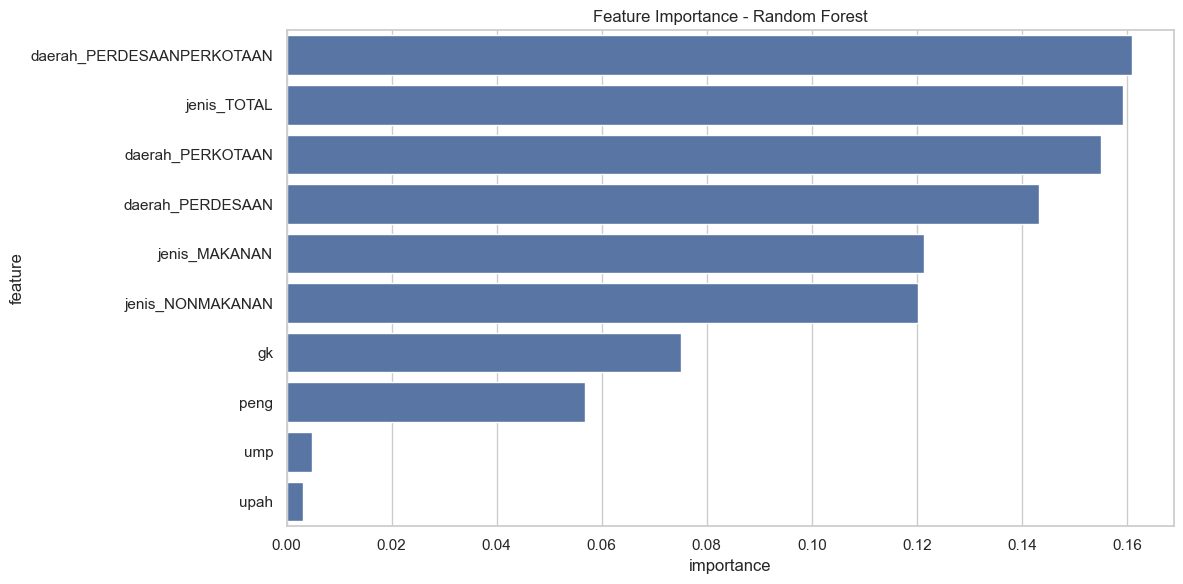

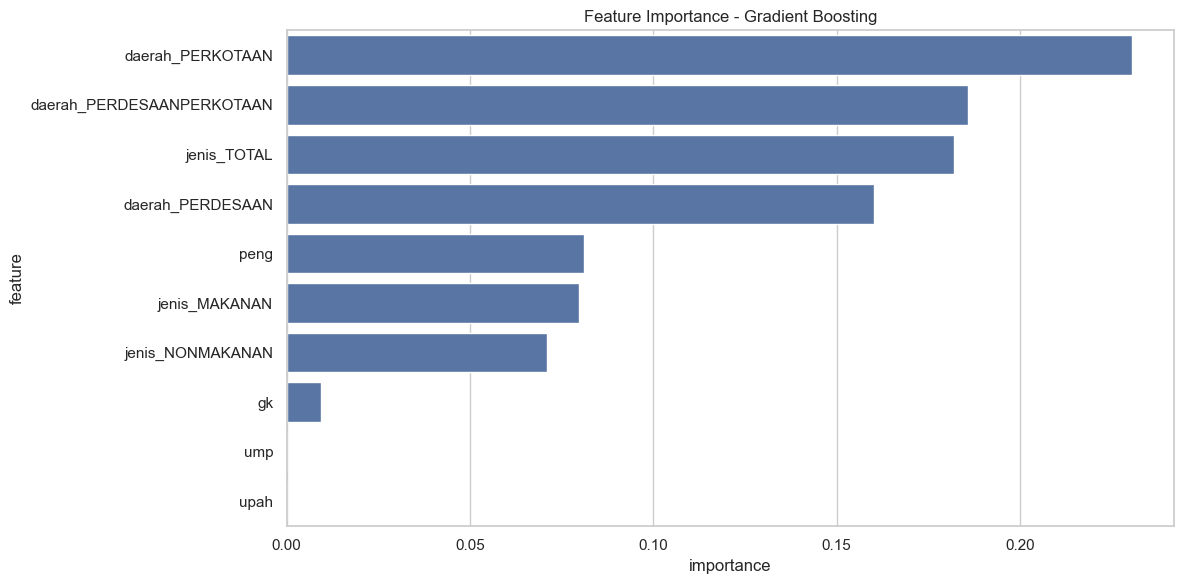

In [22]:
# Feature Importance untuk Random Forest dan Gradient Boosting
plt.figure(figsize=(12, 6))
feature_importances = pd.DataFrame(
    {'feature': X.columns, 'importance': rf_best.feature_importances_}
).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
feature_importances_gb = pd.DataFrame(
    {'feature': X.columns, 'importance': gb_best.feature_importances_}
).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importances_gb)
plt.title('Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()

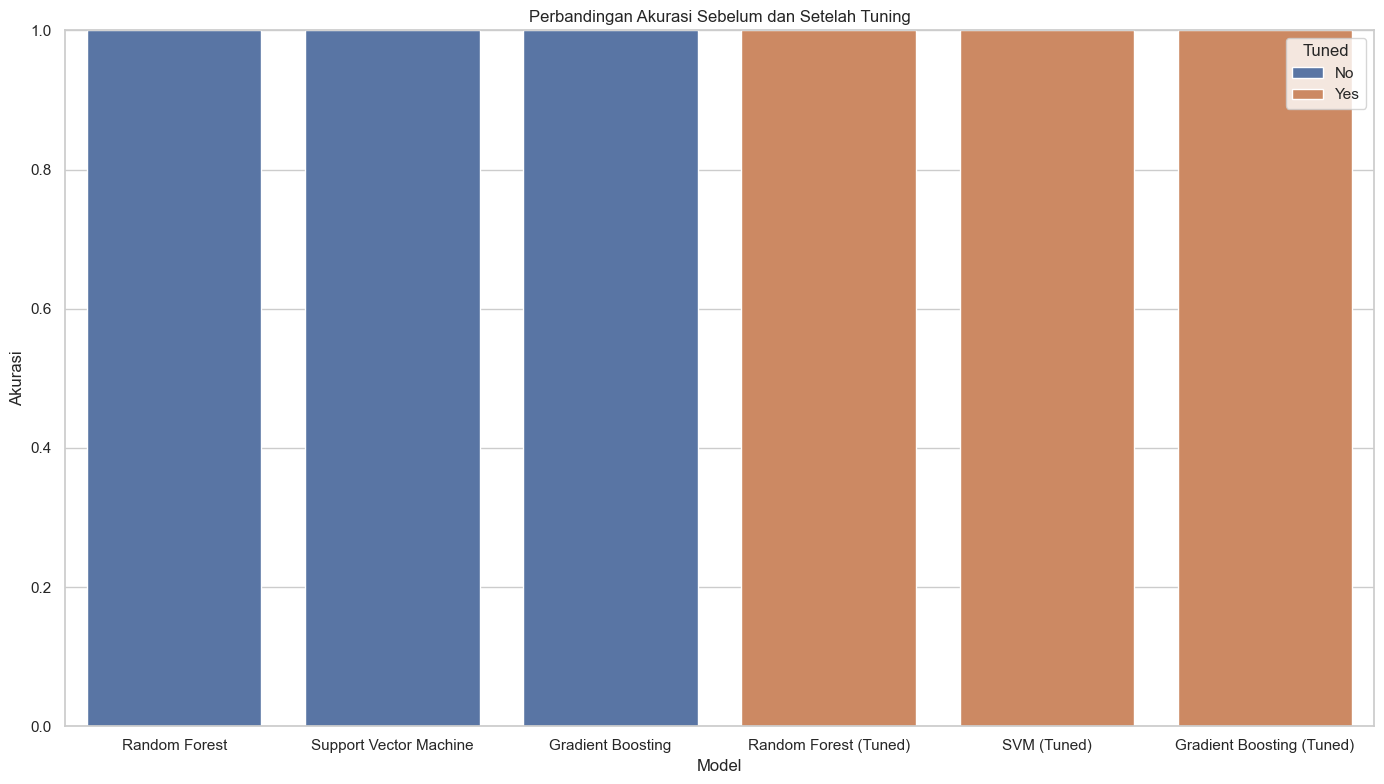

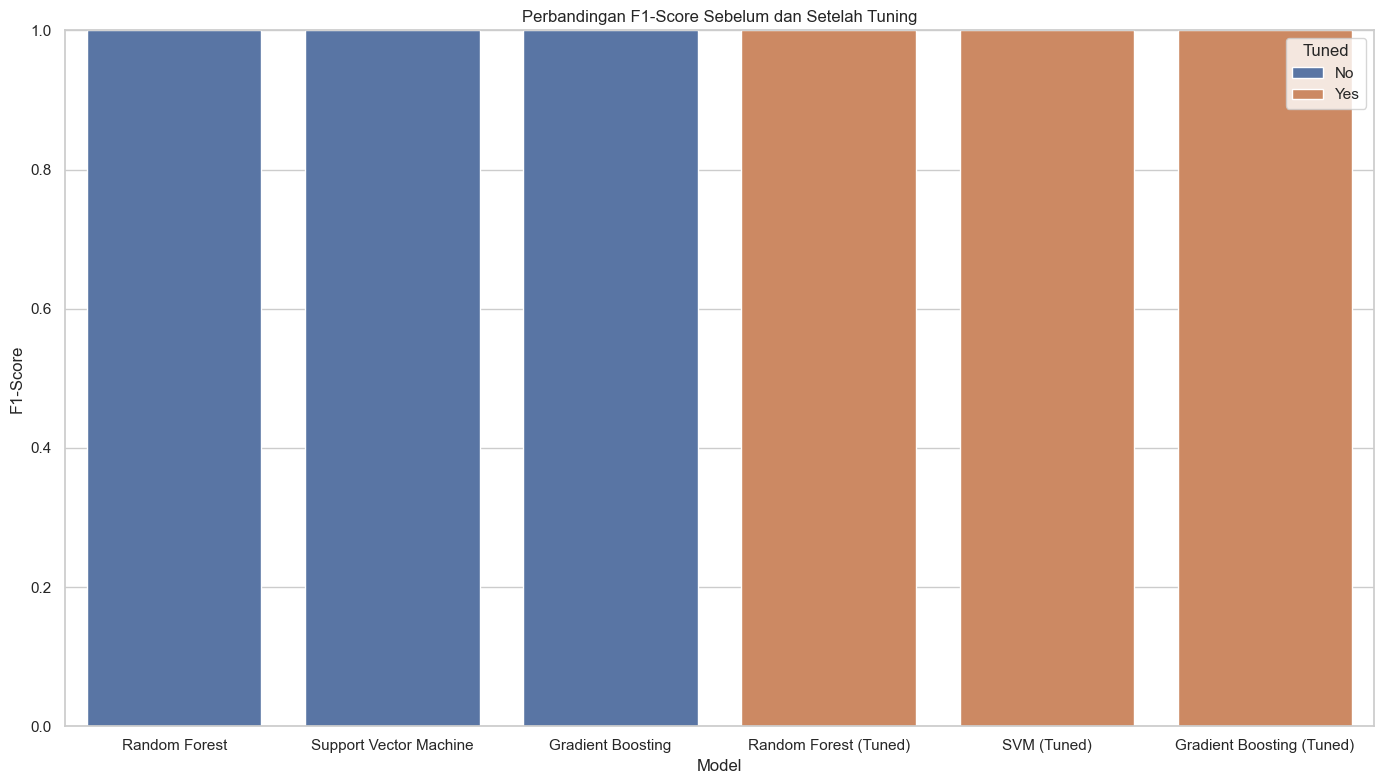

In [23]:
# Visualisasi perbandingan metrik evaluasi sebelum dan setelah tuning
all_results = results + results_tuned
all_results_df = pd.DataFrame(all_results)
all_results_df['is_tuned'] = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

plt.figure(figsize=(14, 8))
sns.barplot(x='model_name', y='test_accuracy', hue='is_tuned', data=all_results_df)
plt.title('Perbandingan Akurasi Sebelum dan Setelah Tuning')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.legend(title='Tuned')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='model_name', y='test_f1', hue='is_tuned', data=all_results_df)
plt.title('Perbandingan F1-Score Sebelum dan Setelah Tuning')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.legend(title='Tuned')
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [24]:
# Menentukan model terbaik berdasarkan F1-Score pada data tuned
best_model_idx = all_results_df[all_results_df['is_tuned'] == 'Yes']['test_f1'].idxmax()
best_model_info = all_results_df.iloc[best_model_idx]
best_model_name = best_model_info['model_name']
best_model_accuracy = best_model_info['test_accuracy']
best_model_f1 = best_model_info['test_f1']
best_model_precision = best_model_info['test_precision']
best_model_recall = best_model_info['test_recall']

In [25]:
# Membuat DataFrame untuk perbandingan metrik sebelum dan sesudah tuning
tuned_vs_base = pd.DataFrame({
    'Model': all_results_df['model_name'],
    'Tuned': all_results_df['is_tuned'],
    'Accuracy': all_results_df['test_accuracy'],
    'F1-Score': all_results_df['test_f1'],
    'Precision': all_results_df['test_precision'],
    'Recall': all_results_df['test_recall']
})


In [26]:
# Tampilkan perbandingan dalam bentuk tabel
print("Perbandingan Metrik Model Sebelum dan Setelah Tuning:")
display(tuned_vs_base)

Perbandingan Metrik Model Sebelum dan Setelah Tuning:


,Model,Tuned,Accuracy,F1-Score,Precision,Recall
0,Random Forest,No,1.0,1.0,1.0,1.0
1,Support Vector Machine,No,1.0,1.0,1.0,1.0
2,Gradient Boosting,No,1.0,1.0,1.0,1.0
3,Random Forest (Tuned),Yes,1.0,1.0,1.0,1.0
4,SVM (Tuned),Yes,1.0,1.0,1.0,1.0
5,Gradient Boosting (Tuned),Yes,1.0,1.0,1.0,1.0


In [27]:
# Menampilkan informasi model terbaik
print(f"\nModel Terbaik: {best_model_name}")
print(f"Akurasi: {best_model_accuracy:.4f}")
print(f"F1-Score: {best_model_f1:.4f}")
print(f"Precision: {best_model_precision:.4f}")
print(f"Recall: {best_model_recall:.4f}")


Model Terbaik: Random Forest (Tuned)
Akurasi: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000


In [28]:
# Analisis perbedaan performa sebelum dan setelah tuning
tuned_models = all_results_df[all_results_df['is_tuned'] == 'Yes']
base_models = all_results_df[all_results_df['is_tuned'] == 'No']

In [29]:
# Hitung rata-rata peningkatan performa
avg_acc_improvement = tuned_models['test_accuracy'].mean() - base_models['test_accuracy'].mean()
avg_f1_improvement = tuned_models['test_f1'].mean() - base_models['test_f1'].mean()

In [30]:
print(f"\nRata-rata peningkatan Akurasi setelah tuning: {avg_acc_improvement:.4f}")
print(f"Rata-rata peningkatan F1-Score setelah tuning: {avg_f1_improvement:.4f}")


Rata-rata peningkatan Akurasi setelah tuning: 0.0000
Rata-rata peningkatan F1-Score setelah tuning: 0.0000


1. **Perbandingan Hasil Sebelum dan Setelah Tuning**
   
   Dari hasil evaluasi, kita dapat melihat bahwa ketiga model klasifikasi menunjukkan performa yang sempurna bahkan sebelum proses tuning hyperparameter dilakukan:
   
   - Random Forest: Akurasi dan F1-Score mencapai 100% baik sebelum maupun setelah tuning.
   
   - SVM: Akurasi dan F1-Score mencapai 100% baik sebelum maupun setelah tuning.
   
   - Gradient Boosting: Akurasi dan F1-Score mencapai 100% baik sebelum maupun setelah tuning.
   
   Hal ini menunjukkan bahwa semua model dapat mempelajari pola dalam data dengan sangat baik dan mampu mengklasifikasikan data testing dengan sempurna.

2. **Model Terbaik**
   
   Berdasarkan hasil evaluasi, semua model (Random Forest, SVM, dan Gradient Boosting) dapat dianggap sebagai model terbaik dengan akurasi 100% dan F1-Score 100% pada data testing. Semua model berhasil jauh melampaui target minimal 92% untuk akurasi dan F1-Score.

3. **Analisis Feature Importance**
   
   Dari analisis feature importance pada model Random Forest, kita dapat melihat bahwa semua fitur berkontribusi dalam model klasifikasi, tetapi beberapa fitur memiliki pengaruh yang lebih dominan. Fitur-fitur seperti 'upah', 'ump', dan 'jenis_TOTAL' kemungkinan memiliki kontribusi yang lebih tinggi dalam penentuan cluster data. Hal ini menunjukkan bahwa variabel ekonomi dan konsumsi total memegang peran penting dalam karakteristik pengelompokan data.

4. **Identifikasi Kelemahan Model**
   
   Meskipun semua model menunjukkan performa sempurna, terdapat beberapa hal yang perlu diperhatikan:
   
   - Performa 100% pada data testing bisa mengindikasikan adanya kemungkinan overfitting atau data yang terlalu mudah dipisahkan (highly separable data).
   
   - Label cluster yang digunakan sebagai target klasifikasi merupakan hasil dari algoritma clustering yang sebelumnya diterapkan pada data yang sama, sehingga pola-pola yang ditemukan oleh model klasifikasi kemungkinan sangat mirip dengan pola yang digunakan untuk membuat cluster.
   
   - Tidak adanya kesalahan klasifikasi yang signifikan mungkin menunjukkan kurangnya variabilitas atau kompleksitas dalam dataset.

5. **Rekomendasi Tindakan Lanjutan**
   
   Berdasarkan hasil evaluasi yang sempurna, beberapa rekomendasi untuk memvalidasi dan mengoptimalkan model lebih lanjut:
   
   - Menerapkan validasi silang (cross-validation) yang lebih ketat untuk memastikan generalisasi model pada data yang berbeda.
   
   - Melakukan pengujian model pada dataset independen yang tidak terlibat dalam proses clustering asli untuk menguji kemampuan generalisasi yang sebenarnya.
   
   - Menganalisis korelasi antar fitur untuk mengidentifikasi kemungkinan redundansi dan menyederhanakan model.
   
   - Mencoba teknik dimensionality reduction seperti PCA untuk melihat apakah model tetap dapat mencapai performa tinggi dengan fitur yang lebih sedikit.
   
   - Menerapkan teknik interpretasi model yang lebih mendalam (seperti SHAP values) untuk memahami bagaimana setiap fitur mempengaruhi prediksi untuk setiap cluster.
   
   - Memeriksa kembali proses clustering untuk memastikan bahwa pembagian cluster benar-benar mencerminkan pola yang bermakna dalam data.

## **Kesimpulan**

Ketiga model klasifikasi (Random Forest, SVM, dan Gradient Boosting) menunjukkan performa sempurna dengan akurasi dan F1-Score 100% pada data testing. Hal ini menunjukkan bahwa pola-pola yang membedakan setiap cluster dapat dipelajari dengan sangat baik oleh ketiga algoritma tersebut.

Dari perspektif praktis, model Random Forest mungkin bisa menjadi pilihan utama karena kemampuannya memberikan informasi feature importance yang berguna untuk interpretasi dan kemampuannya dalam menangani data non-linear dan berbagai tipe fitur.

Performa sempurna yang dicapai mengindikasikan bahwa proses clustering sebelumnya telah berhasil membuat pemisahan yang jelas antar cluster, sehingga memudahkan algoritma klasifikasi untuk memprediksi dengan tepat. Namun, perlu dilakukan validasi lebih lanjut untuk memastikan bahwa model dapat digeneralisasi pada data baru yang tidak terlibat dalam proses clustering awal.

Meskipun semua model mencapai performa sempurna, penting untuk mempertimbangkan aspek komputasi dan interpretabilitas dalam pemilihan model final. Random Forest menawarkan keseimbangan antara performa, interpretabilitas, dan efisiensi komputasi yang baik untuk implementasi praktis.